In [4]:
# Importar as libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
# LEITURA DE DADOS

base_dados = pd.read_csv("Startups+in+2021+end.csv")

# Verificar Dimensão
base_dados.shape

(936, 8)

In [7]:
# Primeiros Registros

base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [8]:
# Colunas
base_dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [36]:
# Renomear
base_dados.rename(columns = {
    "Unnamed: 0":"Id",
    "Company":"Empresa",
    "Valuation ($B)":"Valor($)",
    "Date Joined":"Data de Adesão",
    "Country":"País",
    "City":"Cidade",
    "Industry":"Setor",
    "Select Investors":"Investidores",
    }, inplace=True)

In [37]:
# Verificar Tipo da Informação
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor($B)       936 non-null    object        
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   País            936 non-null    object        
 5   Cidade          921 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    935 non-null    object        
 8   Mes             936 non-null    int64         
 9   Ano             936 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 73.2+ KB


In [34]:
base_dados.isnull()

,Id,Empresa,Valor($B),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
931,False,False,False,False,False,False,False,False,False,False
932,False,False,False,False,False,False,False,False,False,False
933,False,False,False,False,False,False,False,False,False,False
934,False,False,False,False,False,False,False,False,False,False


In [35]:
# Campos Nulos
# Nesse caso não atrapalhará o resultado do estudo
base_dados.isnull().sum()

Id                 0
Empresa            0
Valor($B)          0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
Mes                0
Ano                0
dtype: int64

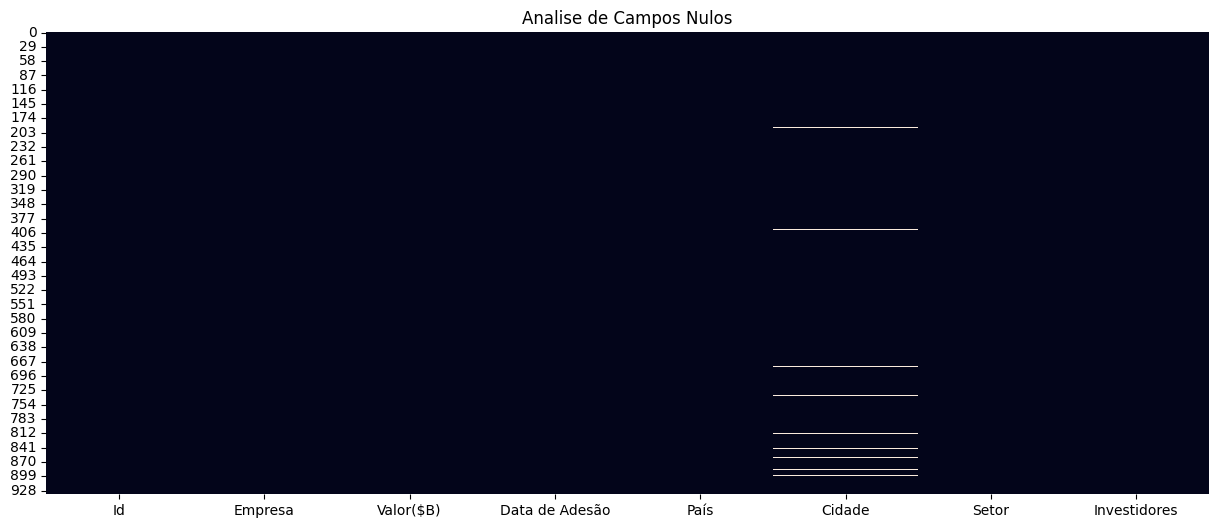

In [13]:
# Gráfica
plt.figure(figsize=(15,6))
plt.title("Analise de Campos Nulos")
sns.heatmap(base_dados.isnull(), cbar=False);
# cbar retira a barra de comparação de cores direita

In [14]:
# Campos Únicos
base_dados.nunique()

Id                936
Empresa           935
Valor($B)         192
Data de Adesão    589
País               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [15]:
# Valores Únicos
base_dados["Setor"].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [16]:
# Valores Únicos - Ranqueado
base_dados["Setor"].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [17]:
# Retorna o percetural de cada um
base_dados["Setor"].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

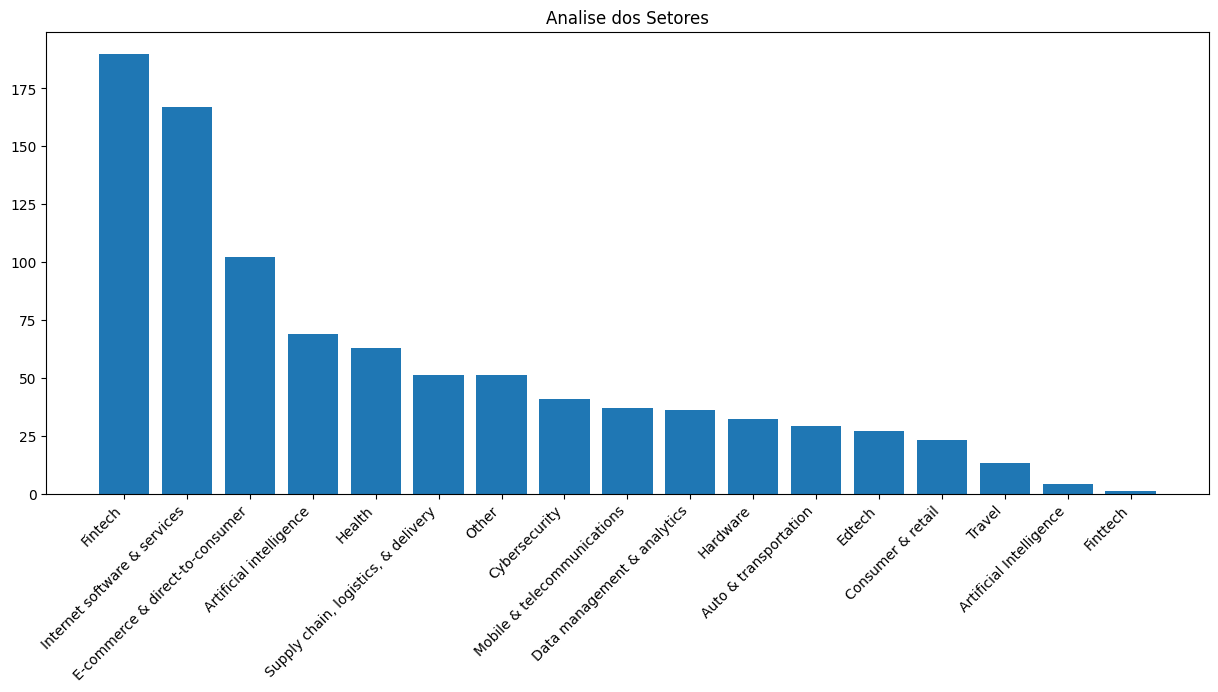

In [18]:
plt.figure(figsize=(15,6))
plt.title("Analise dos Setores")
plt.bar(base_dados["Setor"].value_counts().index, base_dados["Setor"].value_counts())
# plt.bar(colocar os nomes na parte de baixo do grafico com index, usar valores do lugar determinado)
plt.xticks(rotation=45, ha="right"); # ha= parâmetro para orientação

In [19]:
base_dados["País"].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

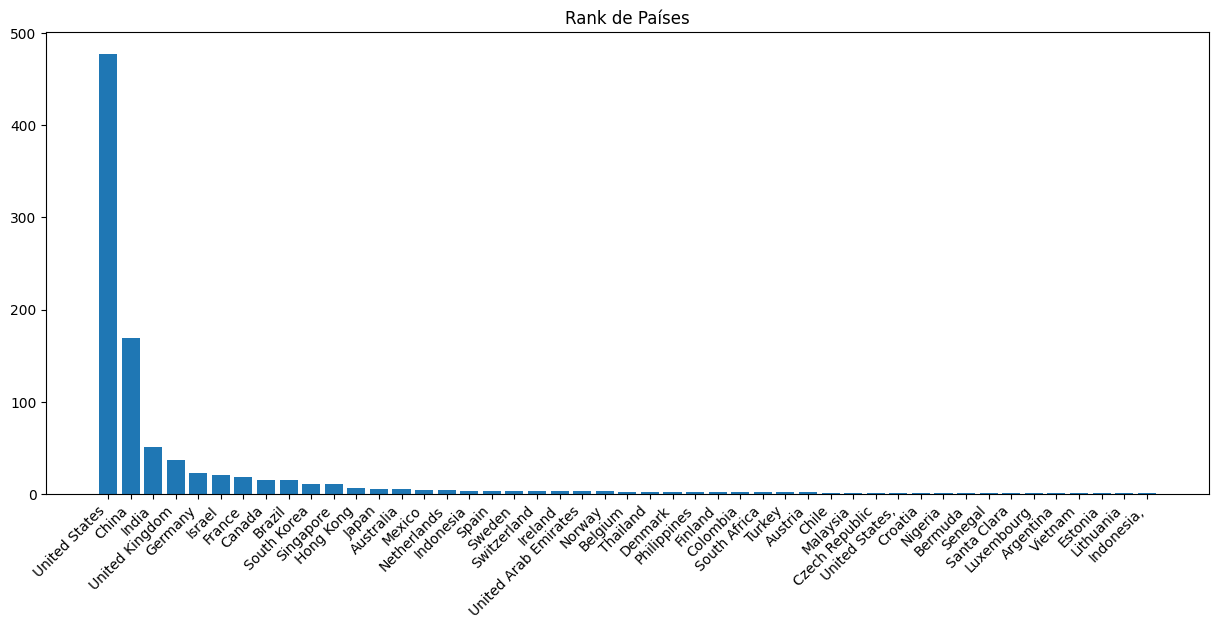

In [20]:
plt.figure(figsize=(15,6))
plt.title("Rank de Países")
plt.bar(base_dados["País"].value_counts().index, base_dados["País"].value_counts())
plt.xticks(rotation=45,ha="right");

In [21]:
# normalize serve para transformar em percentuais
# *100 para transformar em % mais intendível
# Chamar o round( ,1) para apresentar apenas uma casa decimal
Analise = round(base_dados["País"].value_counts(normalize=True)*100,1)
Analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

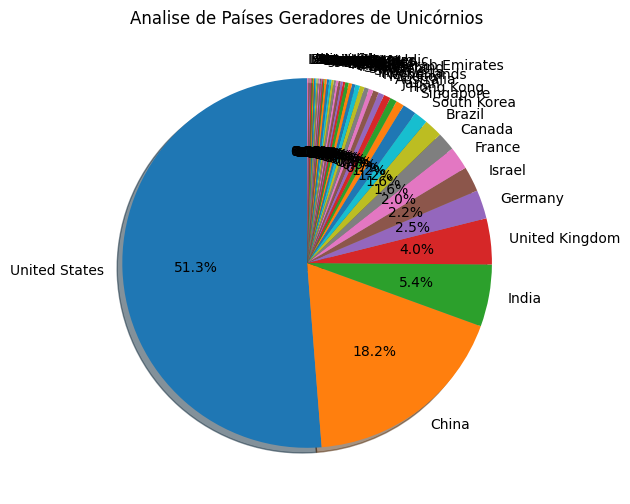

In [22]:
# Gráfico em Pizza
plt.figure(figsize=(15,6))
plt.title("Analise de Países Geradores de Unicórnios")
plt.pie(
    Analise,
    labels = Analise.index,
    shadow=True,
    startangle=90,
    autopct="%1.1f%%"
);



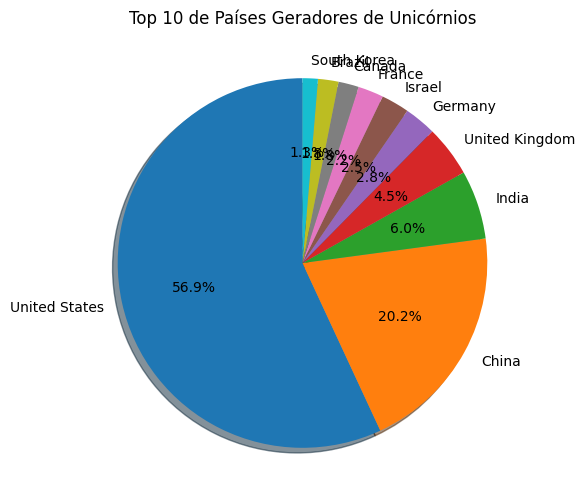

In [23]:
plt.figure(figsize=(15,6))
plt.title("Top 10 de Países Geradores de Unicórnios")
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow = True,
    startangle=90,
    autopct = "%1.1f%%"
);

In [24]:
# Conversão para Data
base_dados["Data de Adesão"]

0        4/7/2017
1       12/1/2012
2       1/23/2014
3      12/12/2011
4        1/8/2018
          ...    
931     12/6/2021
932     12/7/2021
933     12/1/2021
934     12/1/2021
935     12/7/2021
Name: Data de Adesão, Length: 936, dtype: object

In [25]:
base_dados["Data de Adesão"] = pd.to_datetime(base_dados["Data de Adesão"])
base_dados["Data de Adesão"].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [26]:
# Extrair o Ano e o Mes
base_dados["Mes"] = pd.DatetimeIndex(base_dados["Data de Adesão"]).month
base_dados["Ano"] = pd.DatetimeIndex(base_dados["Data de Adesão"]).year

base_dados.head()

# Criei uma nova coluna extraindo do valor o mes e o ano de cada data , acrescentou
# direto no banco de dados duas novas colunas

,Id,Empresa,Valor($B),Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [27]:
# Tablela Analítica
Analise_Agrupada = base_dados.groupby(by=["País", "Ano", "Mes", "Empresa"]).count()["Id"].reset_index()
Analise_Agrupada

,País,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [28]:
Analise_Agrupada.loc[
    Analise_Agrupada["País"] == "Brazil"
]

,País,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [29]:
# Transformando a Coluna Valor
base_dados["Valor($B)"] = pd.to_numeric(base_dados["Valor($B)"].apply(lambda Linha:Linha.replace("$","")))

KeyError: ignored